In [1]:
state = 'WV' 
year = 2020
obj_type = 'bottleneck_Polsby_Popper'
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of WV has 2 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from WV_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 160 plans from file.


In [6]:
from epsilon_constraint import epsilon_constraint_method

(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity = 'lcut',                                             # {'lcut', 'scf', 'shir'} 
            cutoff=None,       
            verbose= True,
            warm_start_mode = 'user',                                        # {'None', 'user', 'refinement'}
            warm_starts=warm_starts,                                         # if you have user define warm starts else it is None
            starting_deviation=starting_deviation, 
            time_limit=7200, 
            sizes=None,      
            max_B=True,                                                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
            symmetry_breaking='orbitope',                                    # {None, 'orbitope', 'rsum'} 
            state=state,
            year=year
        )

Initially, L = 887890 and U = 905826 and k = 2.

****************************************
Trying deviation = 8968.58
****************************************
Using user-provided warm starts.
Selected warm_start = [[0, 4, 8, 13, 17, 18, 19, 23, 26, 28, 29, 31, 33, 34, 36, 42, 45, 50, 52, 54], [1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 20, 21, 22, 24, 25, 27, 30, 32, 35, 37, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 51, 53]]
Objective value: 0.17579521695507364
Deviation: 7758.0

****************************************
Running labeling model!
****************************************
L = 887890 and U = 905826
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to val


****************************************
Optimal solution found! Gurobi status: 2
****************************************
plan = [[0, 2, 4, 6, 8, 13, 17, 19, 23, 26, 28, 29, 31, 33, 34, 36, 42, 45, 50, 52, 54], [1, 3, 5, 7, 9, 10, 11, 12, 14, 15, 16, 18, 20, 21, 22, 24, 25, 27, 30, 32, 35, 37, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 51, 53]]

****************************************
Trying deviation = 2375.75
****************************************
Using user-provided warm starts.
Selected warm_start = [[0, 4, 8, 13, 17, 19, 23, 26, 28, 29, 30, 31, 33, 34, 36, 42, 45, 50, 51, 52, 54], [1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 18, 20, 21, 22, 24, 25, 27, 32, 35, 37, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 53]]
Objective value: 0.17175069940564822
Deviation: 1324.0

****************************************
Running labeling model!
****************************************
L = 894483 and U = 899233
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
S

     0     0    3.88953    0   92    6.02348    3.88953  35.4%     -    0s
     0     0    3.89276    0   95    6.02348    3.89276  35.4%     -    0s
     0     0    3.89560    0   95    6.02348    3.89560  35.3%     -    0s
     0     0    3.89560    0   95    6.02348    3.89560  35.3%     -    0s
     0     2    3.93040    0   95    6.02348    3.93040  34.7%     -    0s

Cutting planes:
  Cover: 1
  Clique: 3
  Zero half: 17
  Lazy constraints: 2

Explored 632 nodes (29074 simplex iterations) in 1.94 seconds (0.47 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 6.02348 

Optimal solution found (tolerance 0.00e+00)
Best objective 6.023477024688e+00, best bound 6.023477024688e+00, gap 0.0000%

User-callback calls 1873, time in user-callback 0.07 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
plan = [[0, 4, 7, 8, 13, 17, 19, 23, 26, 28, 29, 31, 33, 34, 36, 42, 45, 50, 51, 52,

     0     0    3.88505    0   84    6.28814    3.88505  38.2%     -    0s
     0     0    3.88533    0   84    6.28814    3.88533  38.2%     -    0s
     0     0    3.88712    0   84    6.28814    3.88712  38.2%     -    0s
     0     0    3.89005    0   81    6.28814    3.89005  38.1%     -    0s
     0     0    3.89582    0   81    6.28814    3.89582  38.0%     -    0s
     0     2    3.89688    0   81    6.28814    3.89688  38.0%     -    1s
* 1349     1               8       6.2881383    5.79548  7.83%  41.3    2s

Cutting planes:
  Cover: 1
  Zero half: 18
  RLT: 1
  Lazy constraints: 7

Explored 1406 nodes (58211 simplex iterations) in 3.11 seconds (0.76 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 6.28814 6.28814 

Optimal solution found (tolerance 0.00e+00)
Best objective 6.288138285164e+00, best bound 6.288138285164e+00, gap 0.0000%

User-callback calls 3432, time in user-callback 0.15 sec

****************************************
Optimal so

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00075    0    2    7.90008    0.00075   100%     -    0s
     0     0    3.41829    0   69    7.90008    3.41829  56.7%     -    0s
     0     0    3.78436    0   69    7.90008    3.78436  52.1%     -    0s
     0     0    3.80543    0   69    7.90008    3.80543  51.8%     -    0s
     0     0    3.80966    0   75    7.90008    3.80966  51.8%     -    0s
     0     0    3.81701    0   72    7.90008    3.81701  51.7%     -    0s
     0     0    3.84207    0   75    7.90008    3.84207  51.4%     -    0s
     0     0    3.84843    0   81    7.90008    3.84843  51.3%     -    0s
     0     0    3.85689    0   83    7.90008    3.85689  51.2%     -    0s
     0     0    3.85689    0   76    7.90008    3.85689  51.2%     -    0s
     0     0    3.86711    0   78    7.90008    3.86711  51.0%     -    0s
     0     0    3.87549    0   81    7.90008    3.87549  50.9%     -    0s
     0     0    3.8922

 184909 12772 infeasible   37         8.15707    7.53620  7.61%  26.9  116s
 191416  9984    7.88159   36    -    8.15707    7.59405  6.90%  26.9  121s
 197667  6757     cutoff   32         8.15707    7.65915  6.10%  26.8  126s
 202884  3606 infeasible   49         8.15707    7.70891  5.49%  26.7  130s

Cutting planes:
  Gomory: 1
  Cover: 496
  Clique: 2
  MIR: 142
  StrongCG: 169
  Flow cover: 14
  Inf proof: 3
  Zero half: 17
  Lazy constraints: 19

Explored 208745 nodes (5508800 simplex iterations) in 133.05 seconds (47.04 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 8.15707 

Optimal solution found (tolerance 0.00e+00)
Best objective 8.157073981307e+00, best bound 8.157073981307e+00, gap 0.0000%

User-callback calls 421436, time in user-callback 2.40 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
plan = [[0, 2, 4, 6, 8, 9, 13, 17, 19, 20, 22, 23, 26, 28, 29, 31, 33, 

In [7]:
result = list(zip(plans, obj_bounds , deviations))

In [8]:
no_solution_region = [0, min(round(r[2],1) for r in result)]
print(f"No feasible solution was found within the region: {no_solution_region}")

No feasible solution was found within the region: [0, 0.0]



####################################################################################################
Pareto Frontier for state WV,  objective bottleneck_Polsby_Popper
####################################################################################################

Pareto front plans: [[[0, 2, 4, 6, 8, 9, 13, 17, 19, 20, 22, 23, 26, 28, 29, 31, 33, 34, 36, 42, 43, 45, 50, 51, 54], [1, 3, 5, 7, 10, 11, 12, 14, 15, 16, 18, 21, 24, 25, 27, 30, 32, 35, 37, 38, 39, 40, 41, 44, 46, 47, 48, 49, 52, 53]], [[0, 2, 4, 6, 7, 8, 13, 17, 19, 22, 23, 26, 28, 29, 30, 31, 33, 34, 36, 42, 45, 49, 50, 51, 54], [1, 3, 5, 9, 10, 11, 12, 14, 15, 16, 18, 20, 21, 24, 25, 27, 32, 35, 37, 38, 39, 40, 41, 43, 44, 46, 47, 48, 52, 53]], [[0, 2, 6, 7, 17, 19, 21, 23, 24, 26, 28, 29, 31, 32, 33, 34, 35, 36, 39, 42, 45, 50, 51], [1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 22, 25, 27, 30, 37, 38, 40, 41, 43, 44, 46, 47, 48, 49, 52, 53, 54]], [[0, 2, 4, 6, 7, 9, 13, 17, 19, 22, 23, 26, 28, 29, 31, 33, 3

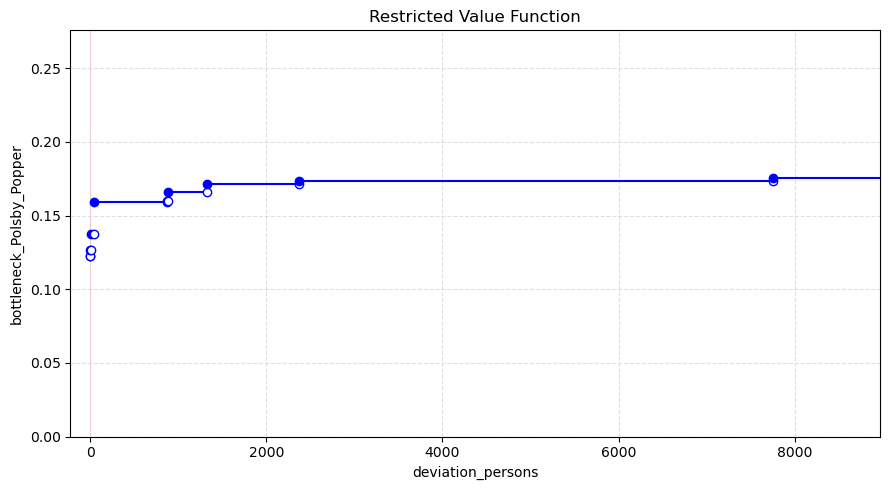

In [9]:
from pareto import plot_pareto_frontiers

plot_pareto_frontiers(
                G,
                method='epsilon_constraint_method',
                plans=None,                                   #if method ='epsilon_constraint_method' is None 
                obj_types=obj_type,                               
                ideal_population=G._ideal_population,
                state=state,
                filepath=filepath,
                filename2=filename2,
                no_solution_region=no_solution_region,
                year=year,
                result=result                               #if method ='heuristic' is None 
             ) 


####################################################################################################
Pareto maps for state WV, objective bottleneck_Polsby_Popper
####################################################################################################



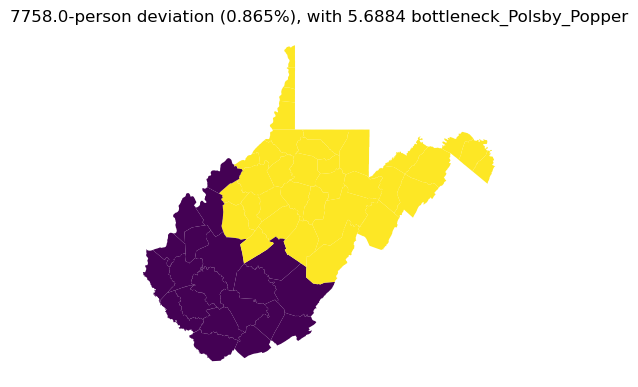

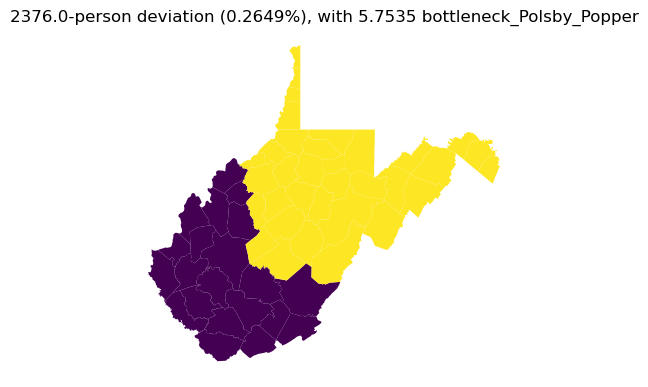

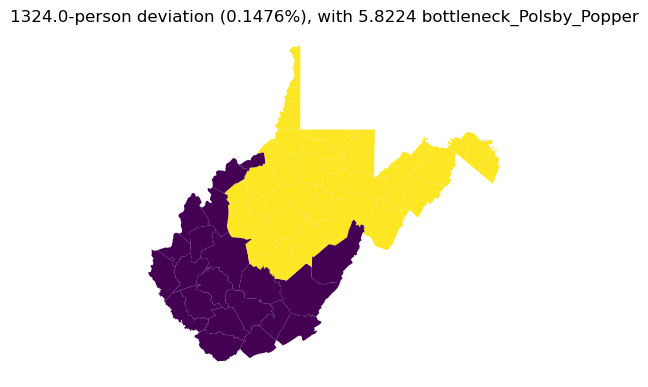

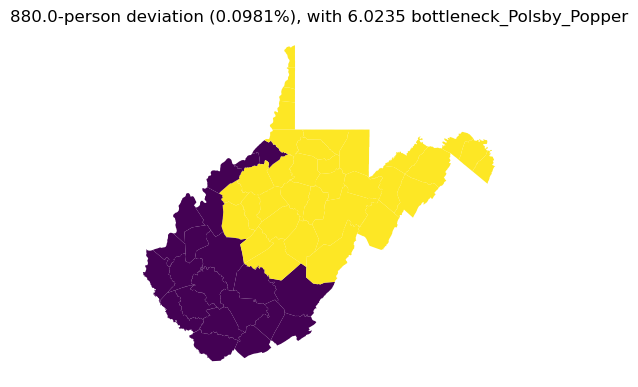

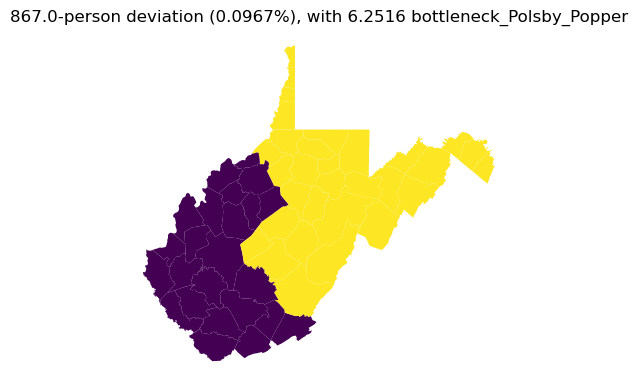

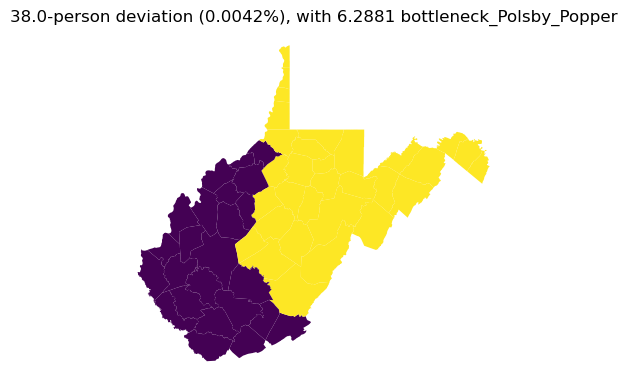

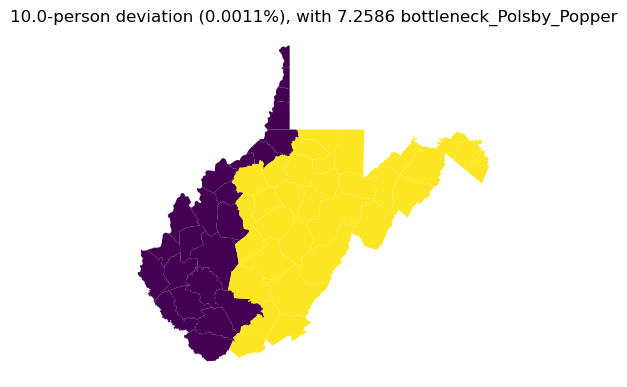

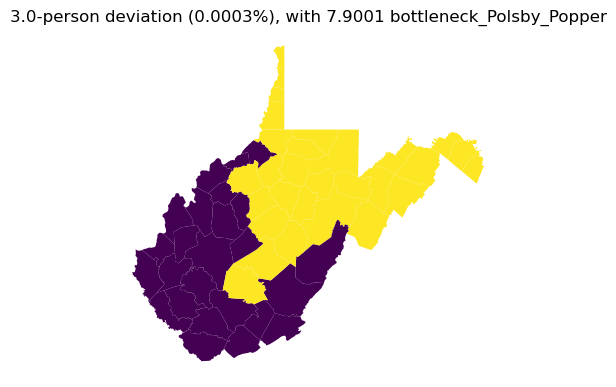

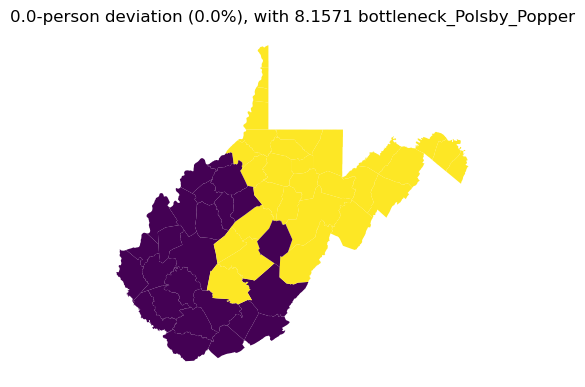

In [10]:
from draw import draw_plan
from metrics import observed_deviation_persons, compute_obj

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: int(x)}
G._L = 0
G._U = G._k * G._ideal_population

for plan, obj_bound, dev in result:
    obs_dev = observed_deviation_persons(G, plan, G._ideal_population)
    obj = compute_obj(G, plan, obj_type)
    obj_val = format_obj.get(obj_type, lambda x: round(x, 4))(obj)
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    title = f"{round(obs_dev, 2)}-person deviation ({deviation_percentage}%), with {obj_val} {obj_type}"
    draw_plan(filepath, filename2, G, plan, title=title, year=year)